<div class="alert alert-info">
    <h2 align="center"> Session 4: Fundamentals of Deep Learning </h2>
</div>

# Recall
- **Machine Learning:** Data + Model + Optimization

### Data:
- **Image Data:** CIFAR-10

### Model
- **Linear classification:** linear score function
- **Non-linear classification:** Multi-layer Neural Networks

### Optimization
- **Loss function:** MSE or Cross-Entorpy
- **Optimization:** Gradient Decsent, SGD, SGD + momentum, etc.
- **Backpropagation:** Computing gradients using chain rule
- **Techniques:** Regularization, Batch Normalization, Dropout, Data Augmentation, etc.

# Today's Topics
- Introduction to Keras
- Implementing Neural Network Using Keras 

<img align="left" src="https://github.com/snrazavi/Machine-Learning-in-Python-Workshop/blob/master/MLiP-week10/imgs/Keras.png?raw=1" width="30%"/>

# Why Keras?
- A very simple and popular framework for **Deep Learning**: (2nd place, 2017)
- It is easy to learn and easy to use.
- Very flexible and powerfull: it works on top of **Tensorflow** from Google.

For more information, please see <a href="https://keras.io">here</a>.

<img src="https://github.com/snrazavi/Machine-Learning-in-Python-Workshop/blob/master/MLiP-week10/imgs/DL-frameworks.png?raw=1" width="75%"/>

## How to install Keras
- If you are using anaconda distribution for python, installing Keras is a very simple task.
- Just type the following in the command prompt:

#### GPU version:
<code>
> conda install -c anaconda keras-gpu
</code>

#### CPU version:
<code>
> conda install -c anaconda keras
</code>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10

num_train = 49000

# Load CIFAR10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

170508288/170498071 [==============================] - 11s 0us/step
Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)


## Data Visualization

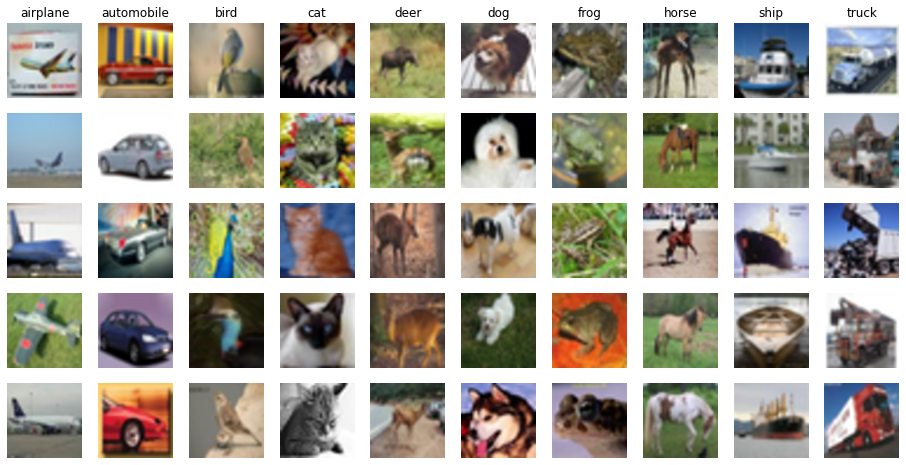

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(X_train[idx], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Preprocessing

In [ ]:
# Convert 4D arrays to 2D arrays
X_train = X_train.reshape([-1, num_features])
X_test  =  X_test.reshape([-1, num_features])

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (50000, 3072)
Test  data shape: (10000, 3072)


In [ ]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


# Linear Classifier

## $$f(x, W, b) = Wx+b$$

<img src="https://github.com/snrazavi/Machine-Learning-in-Python-Workshop/blob/master/MLiP-week10/imgs/linear_classifier.jpg?raw=1" width="75%"/>

In [ ]:
model = Sequential()  # a sequence of layers
model.add(Dense(num_classes, input_shape=(num_features,), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train[:num_train], y_train[:num_train], 
                    batch_size=512, 
                    epochs=15,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)

Epoch 1/15
96/96 - 3s - loss: 2.1030 - accuracy: 0.2477 - val_loss: 2.0296 - val_accuracy: 0.2940 - 3s/epoch - 29ms/step
Epoch 2/15
96/96 - 0s - loss: 1.9711 - accuracy: 0.3121 - val_loss: 1.9580 - val_accuracy: 0.3380 - 455ms/epoch - 5ms/step
Epoch 3/15
96/96 - 0s - loss: 1.9185 - accuracy: 0.3385 - val_loss: 1.9186 - val_accuracy: 0.3560 - 429ms/epoch - 4ms/step
Epoch 4/15
96/96 - 0s - loss: 1.8870 - accuracy: 0.3503 - val_loss: 1.8941 - val_accuracy: 0.3620 - 422ms/epoch - 4ms/step
Epoch 5/15
96/96 - 0s - loss: 1.8652 - accuracy: 0.3587 - val_loss: 1.8742 - val_accuracy: 0.3680 - 418ms/epoch - 4ms/step
Epoch 6/15
96/96 - 0s - loss: 1.8490 - accuracy: 0.3646 - val_loss: 1.8611 - val_accuracy: 0.3730 - 428ms/epoch - 4ms/step
Epoch 7/15
96/96 - 0s - loss: 1.8360 - accuracy: 0.3697 - val_loss: 1.8499 - val_accuracy: 0.3740 - 437ms/epoch - 5ms/step
Epoch 8/15
96/96 - 0s - loss: 1.8254 - accuracy: 0.3742 - val_loss: 1.8413 - val_accuracy: 0.3720 - 421ms/epoch - 4ms/step
Epoch 9/15
96/96 -

In [ ]:
model.save('Linear-model.h5')

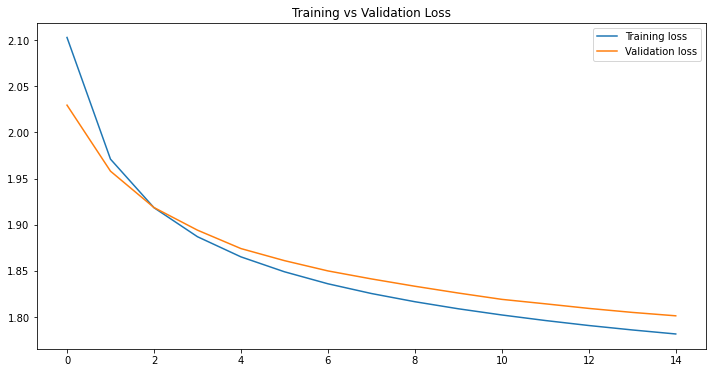

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

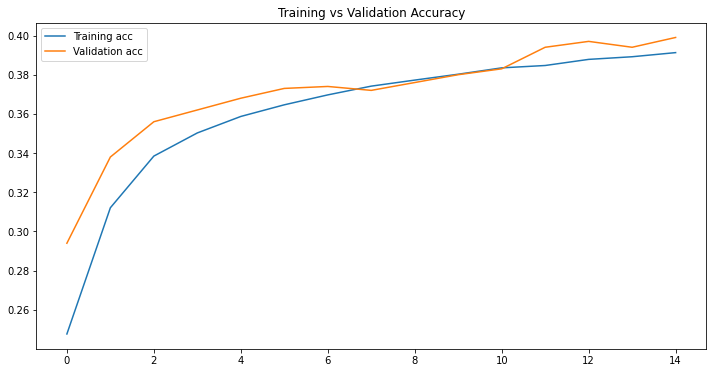

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

## Predicting class for new images

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

# Multi-layer Neural Network

### $$f(x) = W_3 \times \max(W_2 \times \max(0, W_1 x))$$

<img src="https://github.com/snrazavi/Machine-Learning-in-Python-Workshop/blob/master/MLiP-week10/imgs/neural_net2.jpeg?raw=1" width="50%"/>

In [ ]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))

# Second hidden Layer
model.add(Dense(units=100))
model.add(Activation(activation='relu'))

model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))


# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               307300    
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 activation_2 (Activation)   (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

### Training the model

In [ ]:
from tensorflow import keras
from keras import optimizers
optimizer = keras.optimizers.RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 [==============================] - 3s 7ms/step - loss: 1.6985 - accuracy: 0.3968 - val_loss: 1.6170 - val_accuracy: 0.4470
Epoch 2/15
192/192 [==============================] - 1s 6ms/step - loss: 1.4955 - accuracy: 0.4706 - val_loss: 1.5733 - val_accuracy: 0.4370
Epoch 3/15
192/192 [==============================] - 1s 6ms/step - loss: 1.4062 - accuracy: 0.5049 - val_loss: 1.4563 - val_accuracy: 0.4960
Epoch 4/15
192/192 [==============================] - 1s 6ms/step - loss: 1.3348 - accuracy: 0.5305 - val_loss: 1.4517 - val_accuracy: 0.4960
Epoch 5/15
192/192 [==============================] - 1s 6ms/step - loss: 1.2730 - accuracy: 0.5502 - val_loss: 1.3892 - val_accuracy: 0.5110
Epoch 6/15
192/192 [==============================] - 1s 6ms/step - loss: 1.2280 - accuracy: 0.5685 - val_loss: 1.3958 - val_accuracy: 0.5150
Epoch 7/15
192/192 [==============================] - 1s 6ms/step - loss: 1.1846 - accuracy: 0.5819 - val_loss: 1.3927 - val_accuracy: 0.5110
Epoch 

In [ ]:
model.save('nn.h5')
# model = keras.models.load_model('nn.h5')

## Adding Dropout and Batch Normalization

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               307300    
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                      

### Training the model

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 [==============================] - 3s 8ms/step - loss: 1.8002 - accuracy: 0.3490 - val_loss: 1.6165 - val_accuracy: 0.4200
Epoch 2/15
192/192 [==============================] - 1s 7ms/step - loss: 1.6189 - accuracy: 0.4169 - val_loss: 1.5082 - val_accuracy: 0.4510
Epoch 3/15
192/192 [==============================] - 1s 7ms/step - loss: 1.5428 - accuracy: 0.4469 - val_loss: 1.4055 - val_accuracy: 0.4760
Epoch 4/15
192/192 [==============================] - 1s 7ms/step - loss: 1.4994 - accuracy: 0.4639 - val_loss: 1.3814 - val_accuracy: 0.5000
Epoch 5/15
192/192 [==============================] - 1s 7ms/step - loss: 1.4624 - accuracy: 0.4774 - val_loss: 1.3495 - val_accuracy: 0.5270
Epoch 6/15
192/192 [==============================] - 1s 7ms/step - loss: 1.4329 - accuracy: 0.4873 - val_loss: 1.3412 - val_accuracy: 0.5280
Epoch 7/15
192/192 [==============================] - 1s 7ms/step - loss: 1.4126 - accuracy: 0.4956 - val_loss: 1.3135 - val_accuracy: 0.5290
Epoch 

In [ ]:
model.save('nn-dropout-bn.h5')
# model = keras.models.load_model('nn-dropout-bn.h5')

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

40/40 [==============================] - 0s 5ms/step - loss: 1.3136 - accuracy: 0.5303


[1.3136075735092163, 0.5303000211715698]